In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# import yfinance as yf

# stickNo='TWII'
# start_date='2001-03-17.'
# df = yf.download(stickNo,start_date)
# df=df.reset_index()
# df=df.reset_index()
df = pd.read_csv('TW.csv',index_col='Date',parse_dates=['Date'])  #,index_col='Date'
# df = pd.read_csv('TW.csv',index_col='Date',parse_dates=['Date'])  #,index_col='Date'
Close=df.Close
# # df.Date=pd.to_datetime(df.Date,format='%Y-%m-%d')
price=Close.squeeze()
price


ModuleNotFoundError: No module named 'pandas'

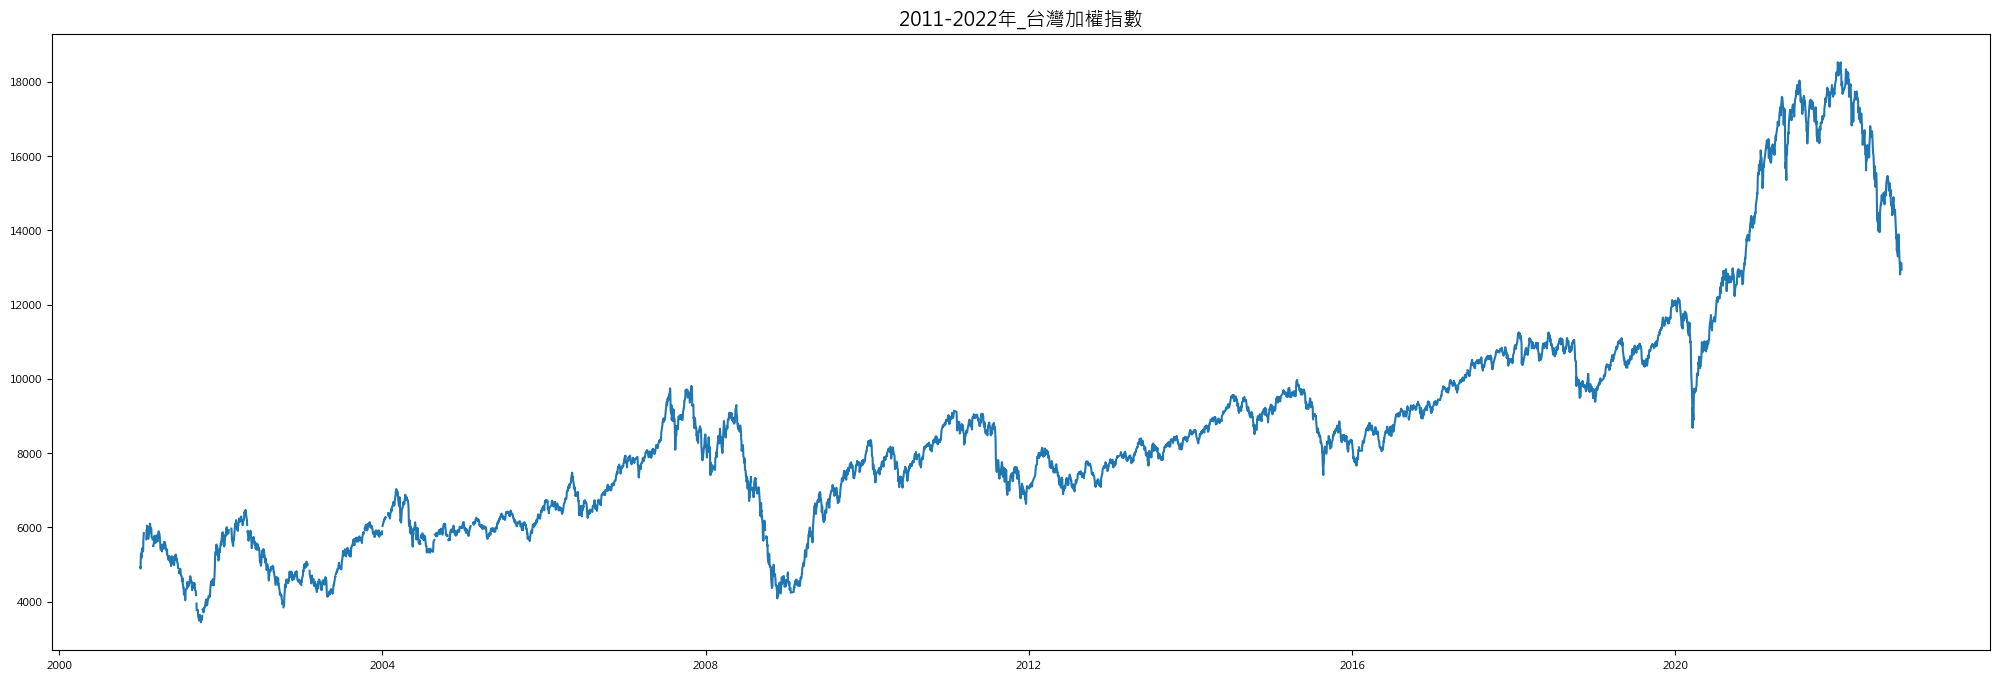

In [24]:
plt.figure(figsize=(25, 8))
plt.title('2011-2022年_台灣加權指數')
plt.plot(price)
plt.show()
plt.legend()

In [43]:
# from Stocker.stocker import Stocker
from Stocker.stocker import Stocker
tw = Stocker(price)

the stock Stocker Initialized. Data covers 2001-01-02 00:00:00 to 2022-10-20 00:00:00.


c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Predicted Price on 2023-01-18 00:00:00 = $13696.17


<Figure size 2500x1000 with 0 Axes>

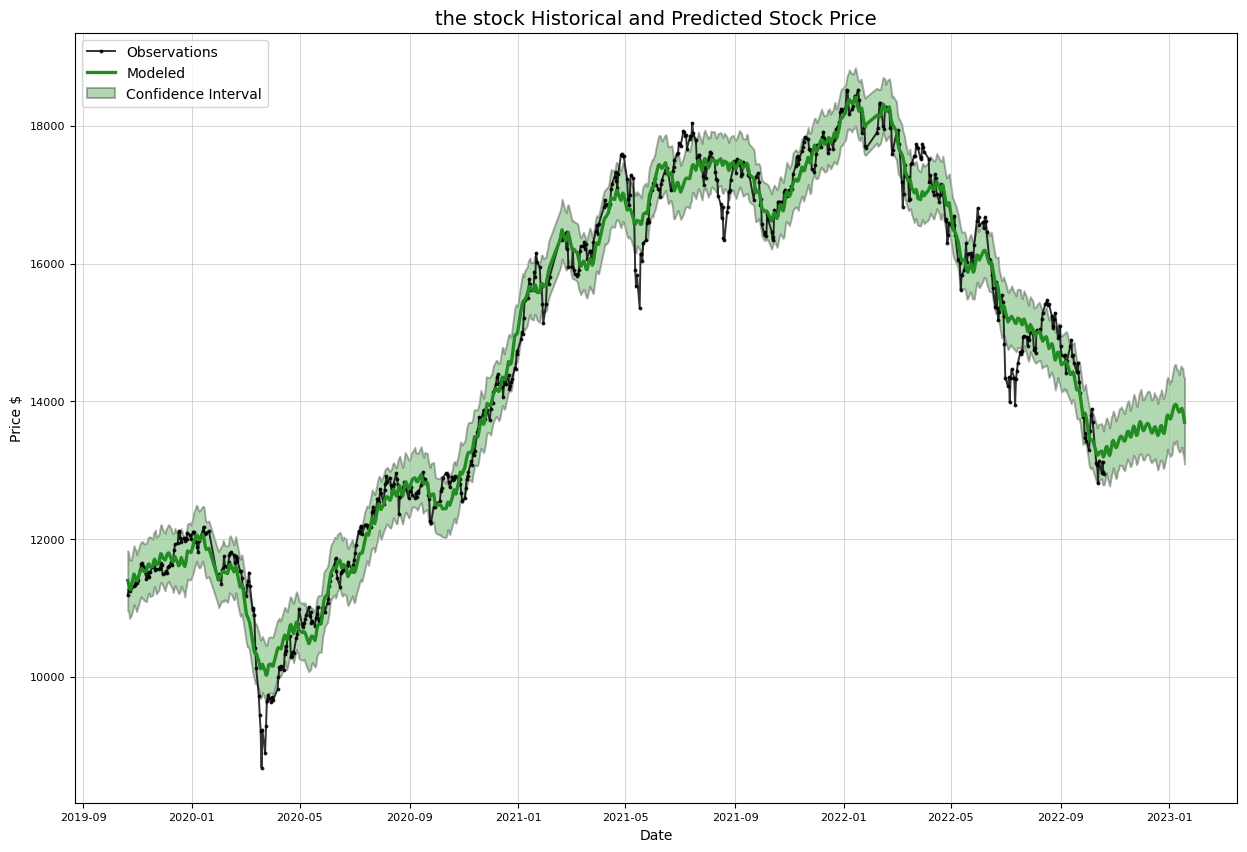

In [44]:
'''
預測中期走勢
深綠色:預測股價
淺綠色:80%信賴區間
'''
model, model_data = tw.create_prophet_model(days=90)

c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Prediction Range: 2021-10-20 00:00:00 to 2022-10-20 00:00:00.

Predicted price on 2022-10-19 00:00:00 = $19341.43.
Actual price on    2022-10-19 00:00:00 = $12976.76.

Average Absolute Error on Training Data = $184.78.
Average Absolute Error on Testing  Data = $2690.62.

When the model predicted an increase, the price increased 50.00% of the time.
When the model predicted a  decrease, the price decreased  50.46% of the time.

The actual value was within the 80% confidence interval 61.79% of the time.


c:\Users\lab516_2\Desktop\上課\金融大數據\永豐\Stocker\stocker.py:519: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


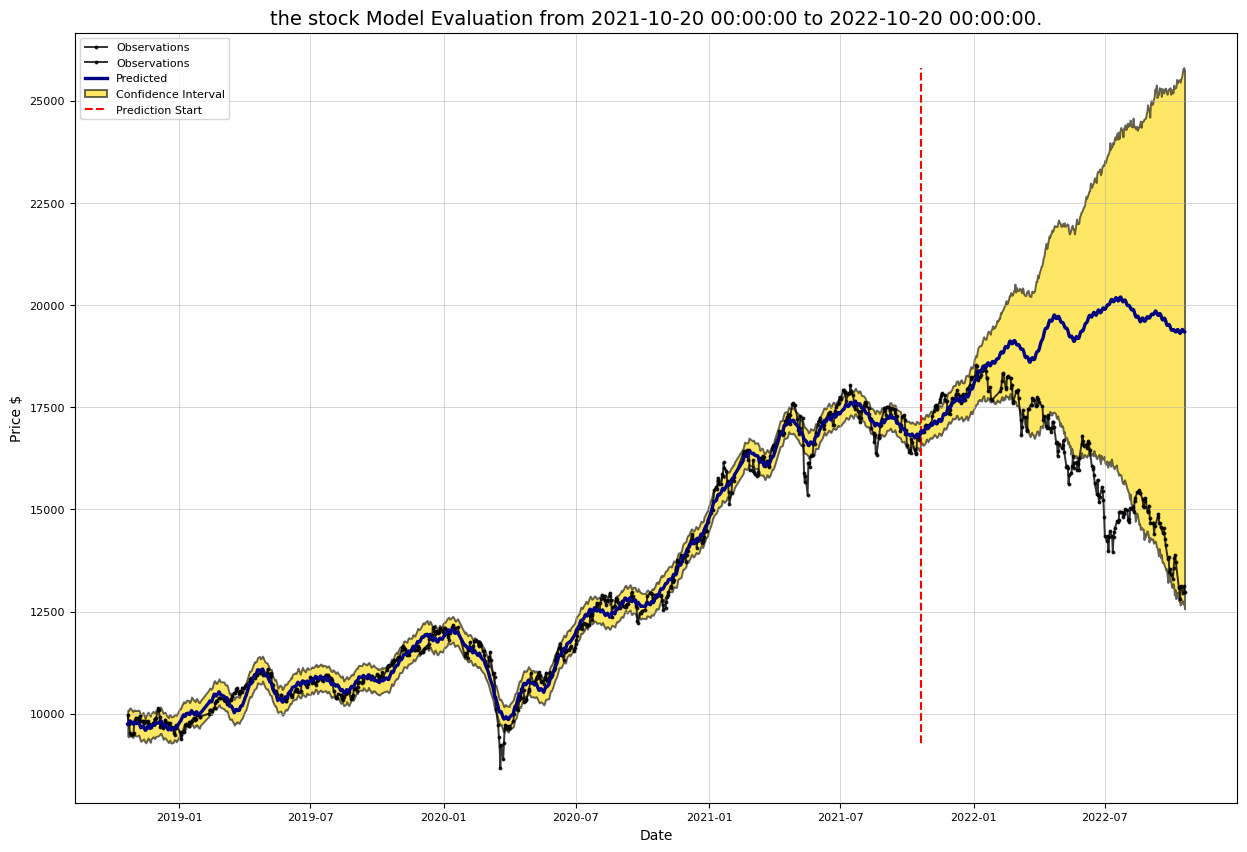

In [28]:
'''
測試預測是否準確
做法 : 將時間線往前推一年(2021/10)來做預測
紅色虛線後都是prophet所進行預測結果
'''

tw.evaluate_prediction()

c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

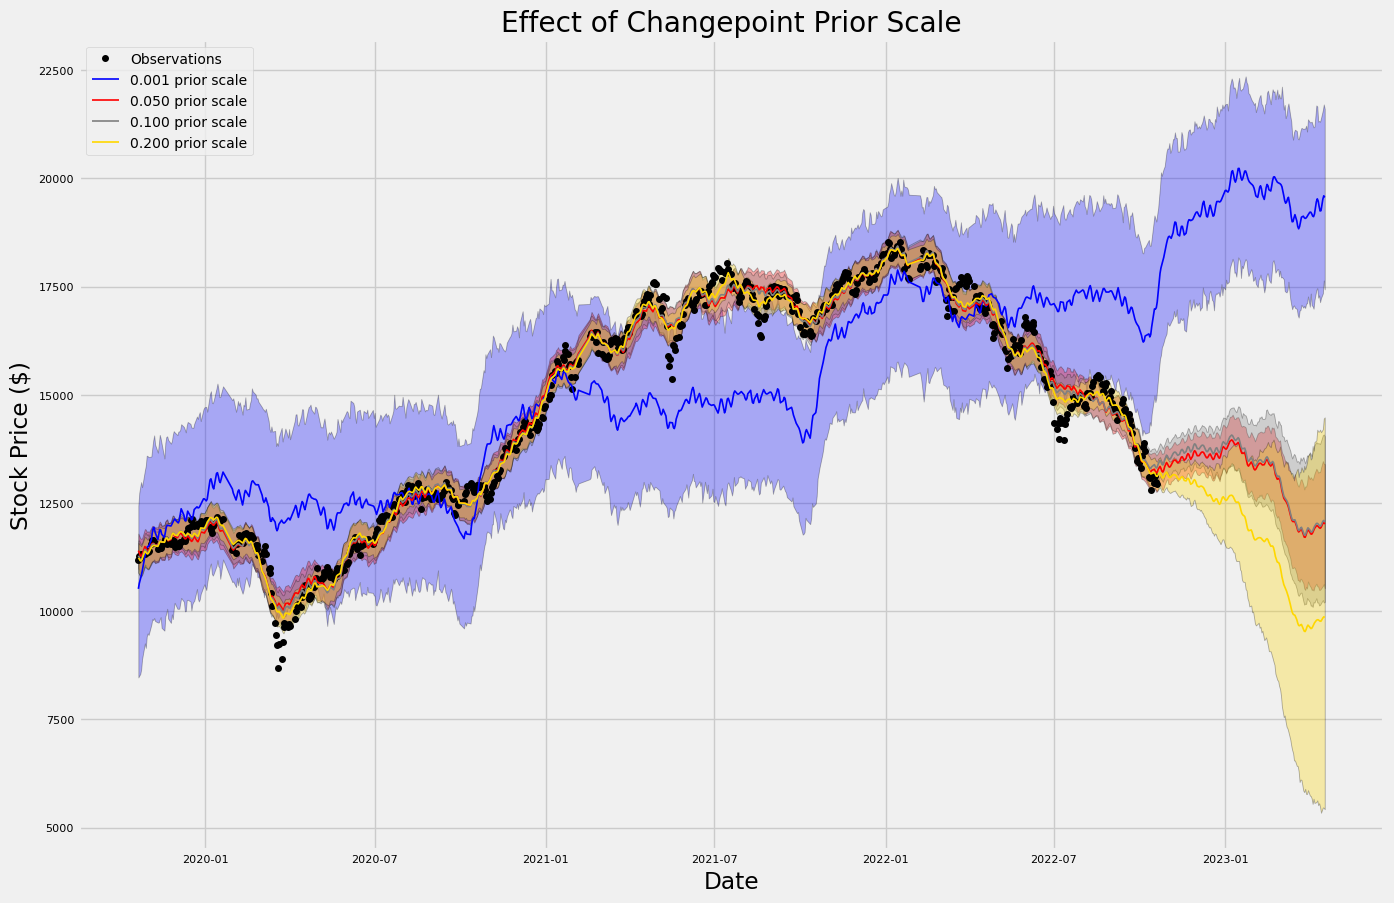

In [45]:
'''
黃色 : 較貼近股價，為短期趨勢預測
藍色 : 較偏趨勢，為長期趨勢預測

'''
tw.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Predicted Increase: 

         Date      estimate     change         upper         lower
1  2022-10-21  13152.406714  35.530829  13494.805706  12781.545675
3  2022-10-23  13199.173479  46.766766  13511.897240  12844.559948
7  2022-10-27  13097.770763  24.492600  13457.631052  12757.724047
8  2022-10-28  13157.743215  59.972452  13507.186317  12809.323105
10 2022-10-30  13213.807956  56.064742  13569.361068  12892.657430
14 2022-11-03  13088.688610   1.705454  13452.281153  12726.244388
15 2022-11-04  13112.479916  23.791306  13485.750642  12760.980686
17 2022-11-06  13151.326217  38.846302  13533.168069  12805.315759
18 2022-11-07  13155.130548   3.804330  13522.274984  12764.733761
25 2022-11-14  13068.191393  28.912059  13458.417912  12675.766871
26 2022-11-15  13100.247663  32.056271  13540.048214  12715.265422
27 2022-11-16  13104.184757   3.937094  13518.203832  12699.505997
32 2022-11-21  13048.760772  39.317484  13489.889850  12562.174046
33 2022-11-22  13070.973091  22.212319 

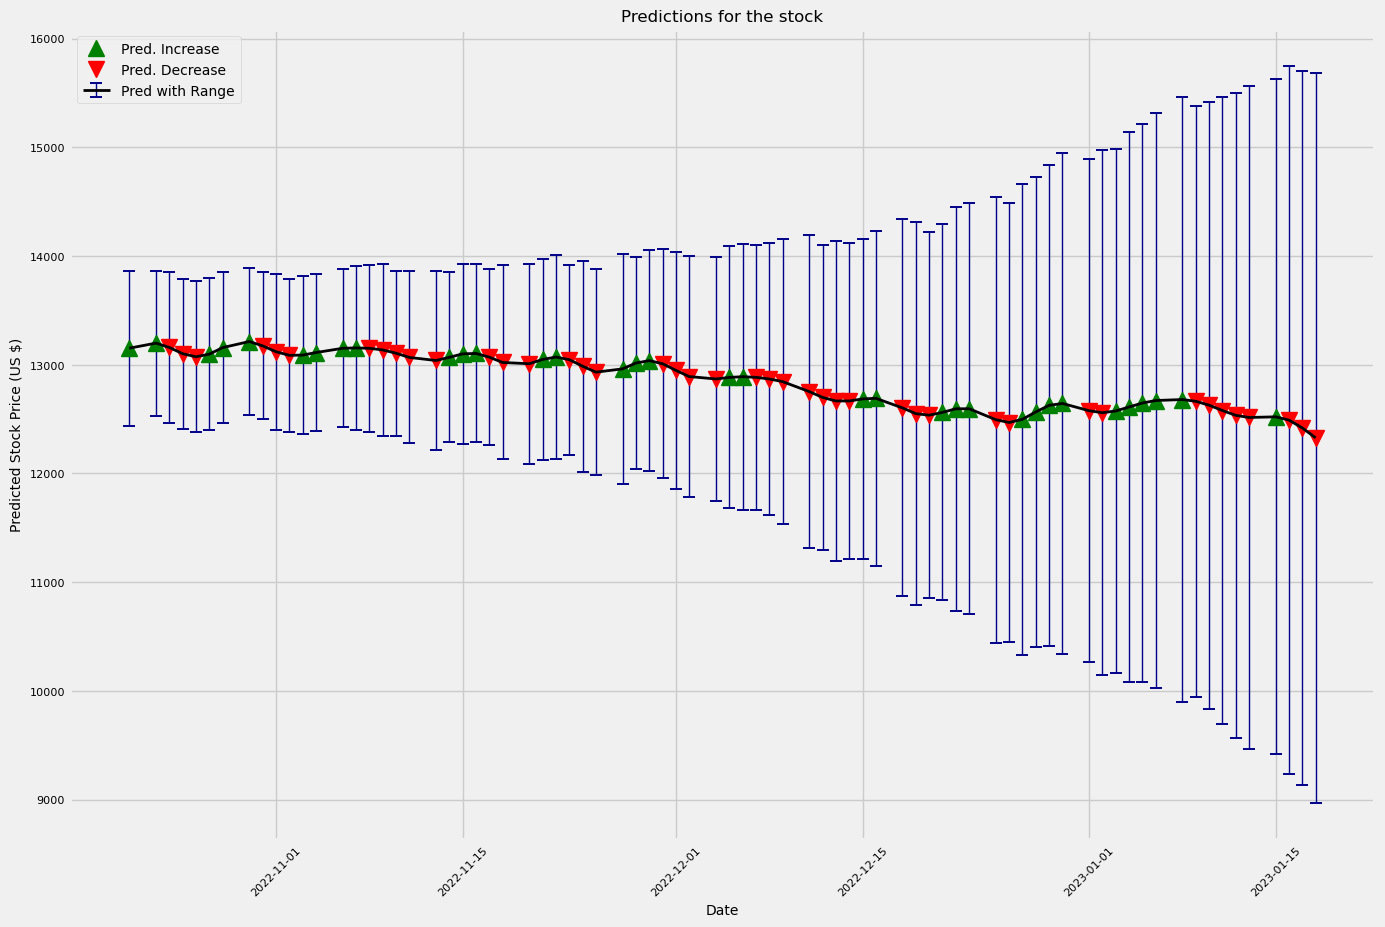

In [46]:
'''
進行預測
'''
prediction = tw.predict_future(days=90)

None



Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\Desktop\上課\金融大數據\永豐\Stocker\stocker.py:924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

     cps   train_err  train_range     test_err   test_range
0  0.001  361.868970  1083.414989   685.878328  1082.198325
1  0.050   91.959639   310.691558  1438.169653  3183.870126
2  0.100   84.811992   277.609006  1775.909878  4696.511384
3  0.200   74.191508   245.000951  1653.456230  8114.504522


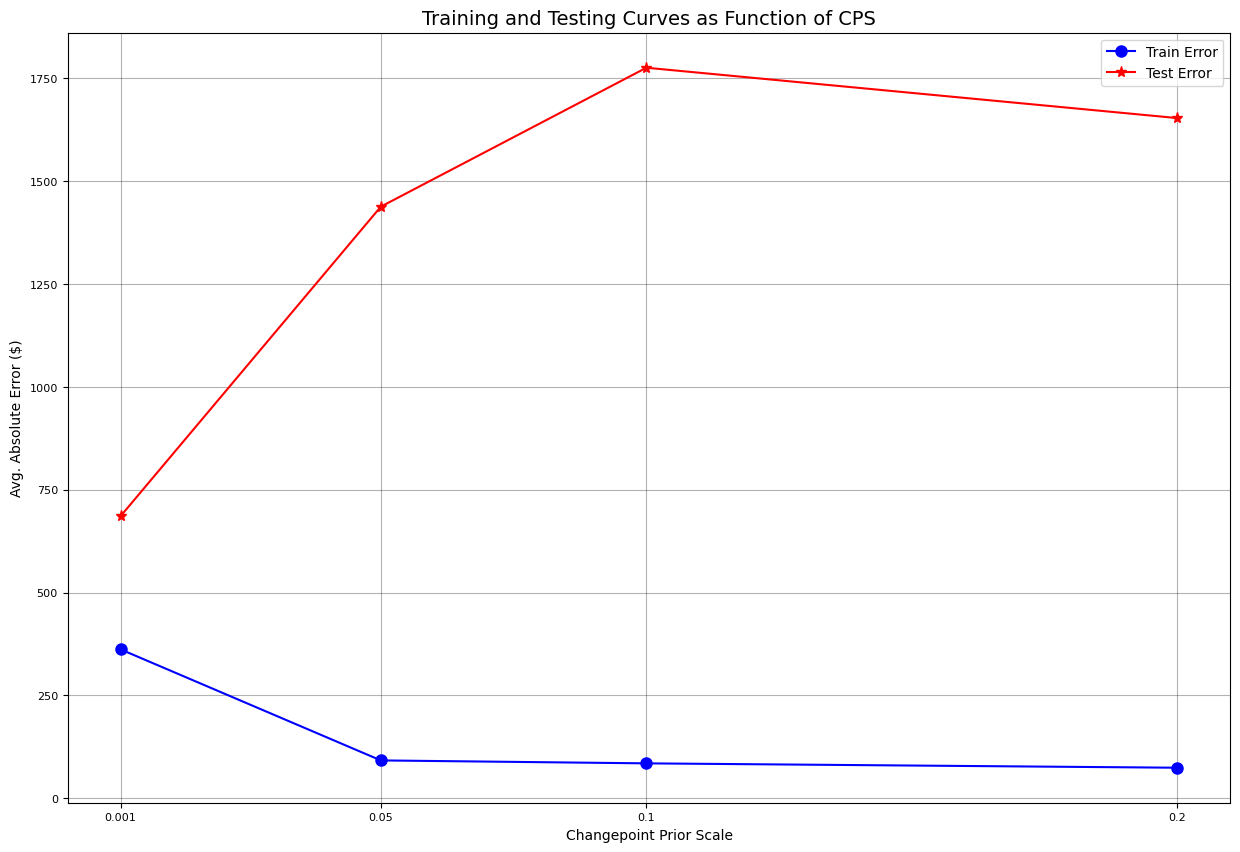

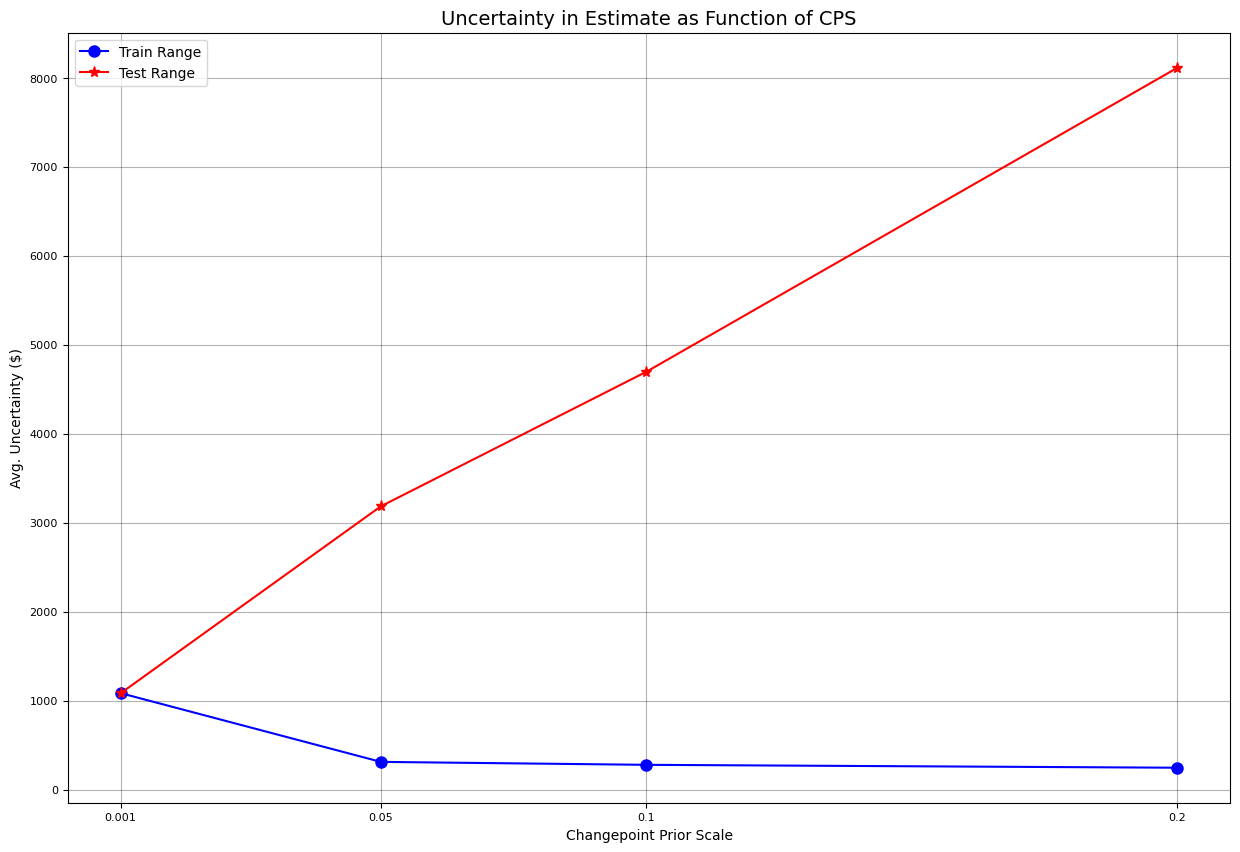

In [37]:
tw.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1,0.2])

c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\lab516_2\anaconda3\envs\Fin_stock\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Prediction Range: 2021-10-20 00:00:00 to 2022-10-20 00:00:00.

Predicted price on 2022-10-19 00:00:00 = $19367.20.
Actual price on    2022-10-19 00:00:00 = $12976.76.

Average Absolute Error on Training Data = $830.19.
Average Absolute Error on Testing  Data = $2201.25.

When the model predicted an increase, the price increased 47.73% of the time.
When the model predicted a  decrease, the price decreased  47.79% of the time.

The actual value was within the 80% confidence interval 47.15% of the time.


c:\Users\lab516_2\Desktop\上課\金融大數據\永豐\Stocker\stocker.py:519: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


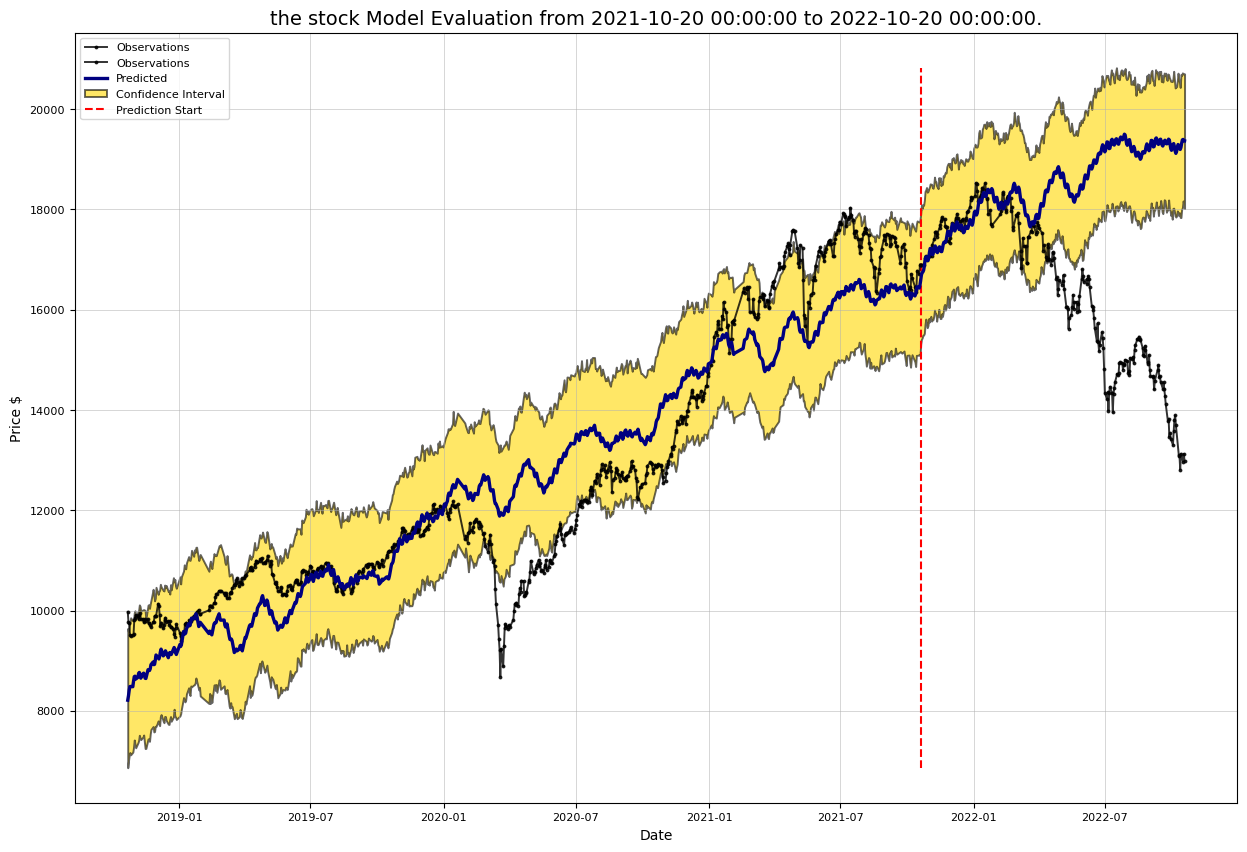

In [39]:
tw.changepoint_prior_scale=0.001
tw.evaluate_prediction()